# USER DEFINED RULES

In [ ]:
!pip install bs4==0.0.1

     |████████████████████████████████| 128 kB 4.3 MB/s 
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=042d419a33332556e6449f7c2468bc8391fc15d535d78610db035253b10b8db0
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd

import random
import re
import pickle
import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
import re
from nltk.corpus import stopwords 
import collections
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install contractions
import contractions

#Sentiment
from textblob import TextBlob

#POS Tagging
import nltk
nltk.download("popular")
from nltk import FreqDist
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from collections import Counter
stop_words = set(stopwords.words('english')) 
import re
#Pre-Processing Imports
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re, sys

#Text Feature Generation
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
     |████████████████████████████████| 106 kB 31.7 MB/s 
     |████████████████████████████████| 287 kB 44.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.


### VISUALISE DATA_Take data where label=Moderately Genuine

In [ ]:
data = pd.read_csv("Moderately_Genuine.csv")
data

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine
4,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,1.0,...,2.0,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Moderately Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59795,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine
59796,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine
59797,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine
59798,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Moderately Genuine


In [ ]:
# Latent symantic analysis
# it will analyse all reviews and determine all reviews belong to the same concept
def LSA(text):
    #text is list of reviews of same product
    
    
    # Created TF-IDF Model
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(text)
    
    # Created SVD(Singular Value Decomposition)
    lsa = TruncatedSVD(n_components = 1,n_iter = 100)
    lsa.fit(X)
    
    terms = vectorizer.get_feature_names()
    concept_words={}

    for j,comp in enumerate(lsa.components_):
        componentTerms = zip(terms,comp)
        sortedTerms = sorted(componentTerms,key=lambda x:x[1],reverse=True)
        sortedTerms = sortedTerms[:10]
        concept_words[str(j)] = sortedTerms
     
    sentence_scores = []
    for key in concept_words.keys():
        for sentence in text:
            words = nltk.word_tokenize(sentence)
            scores = 0
            for word in words:
                for word_with_scores in concept_words[key]:
                    if word == word_with_scores[0]:
                        scores += word_with_scores[1]
            sentence_scores.append(scores)
    return sentence_scores

In [ ]:
data


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine
4,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,1.0,...,2.0,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Moderately Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59795,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine
59796,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine
59797,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine
59798,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Moderately Genuine


In [ ]:
list(data.columns)

['marketplace',
 'customer_id',
 'review_id',
 'product_id',
 'product_parent',
 'product_title',
 'product_category',
 'star_rating',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date',
 'timestamp',
 'IP Address',
 'Sentiment',
 'Subjectivity',
 'Neg_Count',
 'Word_Count',
 'Unique_words',
 'Noun_Count',
 'Adj_Count',
 'Verb_Count',
 'Adv_Count',
 'Pro_Count',
 'Pre_Count',
 'Con_Count',
 'Art_Count',
 'Nega_Count',
 'Aux_Count',
 'Authenticity',
 'AT',
 'Genuinity',
 'label']

In [ ]:
data.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase      int64
review_headline       object
review_body           object
review_date           object
timestamp            float64
IP Address            object
Sentiment            float64
Subjectivity         float64
Neg_Count              int64
Word_Count             int64
Unique_words           int64
Noun_Count           float64
Adj_Count            float64
Verb_Count           float64
Adv_Count            float64
Pro_Count            float64
Pre_Count            float64
Con_Count            float64
Art_Count            float64
Nega_Count           float64
Aux_Count            float64
Authenticity         float64
AT                   float64
Genuinity     

### FEATURE SELECTION

In [ ]:
data.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase      int64
review_headline       object
review_body           object
review_date           object
timestamp            float64
IP Address            object
Sentiment            float64
Subjectivity         float64
Neg_Count              int64
Word_Count             int64
Unique_words           int64
Noun_Count           float64
Adj_Count            float64
Verb_Count           float64
Adv_Count            float64
Pro_Count            float64
Pre_Count            float64
Con_Count            float64
Art_Count            float64
Nega_Count           float64
Aux_Count            float64
Authenticity         float64
AT                   float64
Genuinity     

In [ ]:
print(data.isnull().sum())

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           5
helpful_votes        13
total_votes          13
vine                 13
verified_purchase     0
review_headline      15
review_body          16
review_date          14
timestamp            15
IP Address            0
Sentiment             0
Subjectivity          0
Neg_Count             0
Word_Count            0
Unique_words          0
Noun_Count            0
Adj_Count             0
Verb_Count            0
Adv_Count             0
Pro_Count             0
Pre_Count             0
Con_Count             0
Art_Count             0
Nega_Count            0
Aux_Count             0
Authenticity          1
AT                    0
Genuinity             0
label                 0
dtype: int64


### APPLY USER-DEFINED RULES

### 1. Remove reviews with Meaningless Texts using LSA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
import re
from nltk.corpus import stopwords 
import collections
from nltk.corpus import wordnet

In [ ]:
df1 = pd.read_csv("Moderately_Genuine.csv")
df1

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine
4,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,1.0,...,2.0,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Moderately Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59795,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine
59796,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine
59797,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine
59798,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Moderately Genuine


In [ ]:
df1.set_index("review_id",inplace=True)

In [ ]:
# Latent symantic analysis
# it will analyse all reviews and determine all reviews belong to the same concept
def LSA(text):
    #text is list of reviews of same product
    
    
    # Created TF-IDF Model
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(text)
    
    # Created SVD(Singular Value Decomposition)
    lsa = TruncatedSVD(n_components = 1,n_iter = 100)
    lsa.fit(X)
    
    terms = vectorizer.get_feature_names()
    concept_words={}

    for j,comp in enumerate(lsa.components_):
        componentTerms = zip(terms,comp)
        sortedTerms = sorted(componentTerms,key=lambda x:x[1],reverse=True)
        sortedTerms = sortedTerms[:10]
        concept_words[str(j)] = sortedTerms
     
    sentence_scores = []
    for key in concept_words.keys():
        for sentence in text:
            words = nltk.word_tokenize(sentence)
            scores = 0
            for word in words:
                for word_with_scores in concept_words[key]:
                    if word == word_with_scores[0]:
                        scores += word_with_scores[1]
            sentence_scores.append(scores)
    return sentence_scores

In [ ]:
product_df = df1.groupby("product_id")
#grouping dataset by product_id

unique_products = df1["product_id"].unique()
#stores list of all product id

no_products = len(unique_products.tolist())
#no. of products

remove_reviews = []
#store review_id that are fake 
    
for i in range(no_products):
    #iterate through all product reviews 
    
    df1 = product_df.get_group(unique_products[i])
    #dataframe of a single product
    
    unique_reviews = df1.index.tolist()
    #list of review_id of reviews of same product
    
    no_reviews = len(unique_reviews)   
    #no. of reviews of same product
    
    count = no_reviews 
    #count is no. of reviews that can be analysed
    
    reviews = []
    #list of review texts
    
    review_id = []
    #list of review texts
    
    for j in range(no_reviews):
        #iterate through all reviews
        
        text = str(df1.loc[unique_reviews[j]]["review_body"])
        # text of a review 
        
        #cleaning the text
        text = re.sub(r"\W"," ",text)             
        text = re.sub(r"\d"," ",text)             
        text = re.sub(r"\s+[a-z]\s+"," ",text)    
        text = re.sub(r"^[a-z]\s+"," ",text)    
        text = re.sub(r"\s+[a-z]$"," ",text)    
        text = re.sub(r"\s+"," ",text)
        
        words = nltk.word_tokenize(text)
        #text into word list
        
        if(len(words)==1):
        #if only one word in text review
            
            if(len(text) <=1 or not wordnet.synsets(text) ):
            #if word is having only one character or invalid english word
                
                remove_reviews.append(unique_reviews[j])
                #append this review as fake
                
                count-=1
                #review left to be analysed will be decrease by 1
                
                continue
                #check for next review
                '''
            elif(len(words[0])<=1):
                remove_reviews.append(unique_reviews[j])
                count-=1
                continue
                '''
        elif(len(words)==0):
        #if no words
            
            remove_reviews.append(unique_reviews[j])
            #append this review as fake
            
            count-=1
            #review left to be analysed will be decrease by 1
            
            continue
            #check for next review
        
        review_id.append(unique_reviews[j])
        #valid: append review_id to review_id list for analysis
        
        reviews.append(text)
        #valid: append review_body to reviews list for analysis
        
    ###########################################################################################
    if(count<=0):
        #if no reviews left to analyse 

        continue
        #check for next
        
    if(count==1): 
        #if only one review is left to analyse
        
        #check concept between product title and the review
        
        text = [text,str(df1.loc[review_id[0]]["product_title"])] 
        #add product_title and review to the list 
        
        sentence_scores = LSA(text) 
        #call LSA method to get the score
        
        if(sentence_scores[0]==0): 
        #if review score is 0, then it's fake
            remove_reviews.append(review_id[0])
        continue
    
    #list of scores of reviews of same product
    sentence_scores = LSA(reviews)
            
    for j in range(len(sentence_scores)):
        #iterating through all the scores
        
        if(sentence_scores[j]==0.00):
            # if score is 0, it's fake
            remove_reviews.append(review_id[j])

/root/venv/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


In [ ]:
remove_reviews

['R2XP7IT7WBPZZ4',
 'R1N799NZ4DA5I9',
 'R2IJJ3700Y0FAV',
 'R2K2WK38XR5FKZ',
 'R8P7Q3NE3Y83S',
 'RH5S9U2O986EO',
 'R2J6S9QEIBXZ12',
 'R37R7W7NP0W2HR',
 'R2Q49CHI4FQE7W',
 'R20HZYSZNZCTXI',
 'R1FYQ6XBZ7DROH',
 'R16AB1BB711MQ',
 'R2H4ZPCDG6J499',
 'R1I45HX1F3CEEN',
 'R33B5EJNQUDJFQ',
 'R263HF7Y019EXN',
 'R2HY5SZEWWV85X',
 'R3MVJI5VIUD1X5',
 'RORI55TTADI1D',
 'R3QGSRYM0O677I',
 'R7GX7JKCBQEBJ',
 'R3IWX7KI9ME00Z',
 'R3H3Q9C71TJ245',
 'R2OXHXPHP6QFDH',
 'R2M2DJYNGDYKQV',
 'R3OCDJBYBH58H4',
 'RHDVMBV6IE7XH',
 'R1DC4EYQQFBQ5N',
 'R3DWI4IGHITTSB',
 'RVL6X6XTAV2OC',
 'R2XB3EGZKSEKT6',
 'REVNCXLCI2693',
 'R351AEVJKC896B',
 'R37BYYM3LNJ04',
 'R2QNV1CY6IR8YZ',
 'R34EZZ68VYPHO0',
 'RDO57PI4KV5IA',
 'R8XZVIW6UHPGF',
 'R18FQT7C4UFCBD',
 'R3898FYOA3LAYV',
 'R1XB7Z542G0I97',
 'R2K6X4LC2NHV0R',
 'R20HND185O0FLE',
 'R1XYU41VP0ZXLA',
 'RO6UAHSJNV9E6',
 'R104MY31OKNGXH',
 'RWT1OTTEV12NZ',
 'R2H7T7QDBOLJXW',
 'R1MJCQGOKPWSO6',
 'R3LJGWW0TUM2DE',
 'RJLIBGUCDLEZ7',
 'RS3QHIU5EDJCF',
 'R1YTBAG6HD48JI',
 'R3DQHD

In [ ]:
with open(r'remove_reviews.txt', 'w') as fp:
    for item in remove_reviews:
        # write each item on a new line
        fp.write("%s\n" % item)

### 2. Similar reviews posted in the same time interval

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:

tfidf_vectorizer = TfidfVectorizer()

In [ ]:
df2 = pd.read_csv("Moderately_Genuine.csv")
df2

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine
4,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,1.0,...,2.0,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Moderately Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59795,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine
59796,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine
59797,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine
59798,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Moderately Genuine


In [ ]:

df2.reset_index()
df2.set_index("review_id")

,marketplace,customer_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
review_id,,,,,,,,,,,,,,,,,,,,,
R8MEA6IGAHO0B,US,20422322,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,N,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine
R31LOQ8JGLPRLK,US,40835037,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,N,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine
R2Y0MM9YE6OP3P,US,51469641,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,N,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine
RRB9C05HDOD4O,US,4332923,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,N,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine
RY8DDL22YG4R5,US,7846966,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,1.0,N,...,2.0,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Moderately Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R2CDRVDUKB5Z9P,US,38978459,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine
R1DVLTZFXXOX9,US,51697602,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine
R1GHKKZMHAHQC1,US,50891675,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine


In [ ]:
df2.sort_values("timestamp",inplace=True)

In [ ]:
def OnlyStopwords(str):
    words = nltk.word_tokenize(str)
    words = [word for word in words if word not in stopwords.words("english")]
    if(len(words)==0):
        return True
    return False

In [ ]:
OnlyStopwords("to")

True

In [ ]:
from nltk.corpus import wordnet

remove_reviews2 = []
indices = []
for i in range(len(df2)):
    
    reviews = [str(df2["review_body"][i])]
    
    try:
        tfidf_vectorizer.fit_transform(reviews)
    except:
        # reviews with one word and with no dictionary meaning will be invalid
        # e.g- ["c","O.K."]
        remove_reviews2.append(df2["review_id"][i]) 
        continue
        
    Time = df2["timestamp"][i]
    # timestamp of the review that will be compared
    
    for j in range(i+1,len(df2)):
            
        indices.append(df2["review_id"][j])
        
        if(df2["timestamp"][j]-Time <= 1800):
            # reviews written in 30 min of intervals will be checked for same pattern
            reviews.append(str(df2["review_body"][j]))
        else:
            break
    
    tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)
    
    #creates TF-IDF Model
    tfidf_list = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix).tolist()
    # Creates matrix based on document similarity
         
    # To check similarity b/w 2 reviews
    i_appended = False
    for k in range(1,len(tfidf_list[0])):
        #print(tfidf_list[0][k],i+k)
        
        if(tfidf_list[0][k]>0.6):
            # 0.6 is defind for the simmilarity level
            
            remove_reviews2.append(df2["review_id"][i+k])
            # i+k is to get the review id of the review
            
            if(not i_appended):
                remove_reviews2.append(df2["review_id"][i]) 
                i_appended = True
 

In [ ]:
remove_reviews2

['R8MEA6IGAHO0B',
 'R8MEA6IGAHO0B',
 'R2V3BZMI3YQXX8',
 'R2J68T8Y2ZWUSP',
 'R3KMVTYXYDOU1O',
 'RAM9PGMJX3QHC',
 'R32V8MSKMMLUN5',
 'RHD4B4FI8ZOX0',
 'R2O0LZSPMME6US',
 'R5F0MONILUKRP',
 'R3T4FXBLX36ZVL',
 'R286FBMJM6KBVL',
 'R3222TQXKRY5SC',
 'R1MQJWZVLX625B',
 'R3KD1E9HEX42AL',
 'R1OOWBOVU8QDZJ',
 'R12Q4C7XNW665',
 'R1PTHDWKRTF5DT',
 'RNN38RFJVIE5G',
 'R3EFBMPPEHZOZV',
 'RA6OHYP373VWR',
 'R1KU1LI5H6WEYP',
 'RNP0IW2BEJTYF',
 'R1Y0D9EH8E7AXA',
 'RUAXZ2T4XBWE0',
 'RZR8DOQ6AZOGP',
 'R2H7T7QDBOLJXW',
 'R1KXHOYWM8CDWY',
 'R1L7AUETBKS36D',
 'R37LNCQB511I58',
 'RQZ5DGUWN3U1A',
 'RDM2R57IACDV8',
 'R2FA42Y6WH9T7X',
 'RMW17CI6V8FQS',
 'R1PXJJ1V25YK0F',
 'R30Q1TM5KNBGYJ',
 'R3GUFVMUDMMVSP',
 'R1UXNK73S0RE7D',
 'R1VVDY2OPRXUFO',
 'R10QSCIA3H9VUB',
 'R3C7OODQINRA8M',
 'R8J978HOHN8OI',
 'R140KV2YTBW809',
 'R2T628MWOORD5L',
 'RNAFMG7E8AV98',
 'R22C1N6ZTRCH9X',
 'R3AXWUF0IRZGWA',
 'R3L1RQZC3MVSNT',
 'R3ISGPEW3GWCVT',
 'R3LD5J71OUGAUV',
 'R3IB0T9HT1U7TT',
 'R2SU3LIZTQC9OB',
 'R2H0G6P50Y109L',
 'R2SI18D

In [ ]:
with open(r'remove_reviews2.txt', 'w') as fp:
    for item in remove_reviews2:
        # write each item on a new line
        fp.write("%s\n" % item)

### 3.different sentiment in review headline and review body

Using dataset df3 and remove_review3 for the next few steps

In [ ]:
df3=pd.read_csv("Moderately_Genuine.csv")
df3

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine
4,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,1.0,...,2.0,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Moderately Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59795,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine
59796,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine
59797,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine
59798,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Moderately Genuine


In [ ]:
##1. different sentiment in review headline and review body\n

In [ ]:
!pip install "scikit_learn==0.22.2.post1"

     |████████████████████████████████| 7.1 MB 20.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Not uninstalling scikit-learn at /shared-libs/python3.7/py/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'scikit-learn'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:

!pip install scikit-learn
!pip install sklearn.linear_model.logistic

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement sklearn.linear_model.logistic (from versions: none)
ERROR: No matching distribution found for sklearn.linear_model.logistic
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
### WORKING ON YELP DATA FOR SENTIMENTAL ANALYSIS

#You can download these pickle files from https://github.com/anubhavs11/Sentimental-Analysis-using-Logistic-Regression
with open("SentimentClassifier.pickle","rb") as f:
    clf = pickle.load(f)

with open("Sentiment_cv.pickle","rb") as f:
    tfidf = pickle.load(f)


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
def getSentiment(text):

 # PREPROCESSING THE DATASET\n",
    text = str(text)
    text = text.lower()
    text = re.sub(r"that's","that is",text)
    text = re.sub(r"there's","there is",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"where's","where is",text)
    text = re.sub(r"it's","it is",text)
    text = re.sub(r"who's","who is",text)
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"she's","she is",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"they're","they are",text)
    text = re.sub(r"who're","who are",text)
    text = re.sub(r"ain't","am not",text)
    text = re.sub(r"wouldn't","would not",text)
    text = re.sub(r"shouldn't","should not",text)
    text = re.sub(r"can't","can not",text)
    text = re.sub(r"couldn't","could not",text)
    text = re.sub(r"won't","will not",text)

    text = re.sub(r"\W"," ",text)
    text = re.sub(r"\d"," ",text)
    text = re.sub(r"\s+[a-z]\s+"," ",text)
    text = re.sub(r"^[a-z]\s+"," ",text)
    text = re.sub(r"\s+[a-z]$"," ",text)
    text = re.sub(r"\s+"," ",text)

    
    #testimonial = TextBlob(text)
    #sent=testimonial.sentiment.polarity
    sent=clf.predict(tfidf.transform([text]).toarray())
    return sent[0]

In [ ]:
remove_reviews3 = []
    # stores the list of review_id of fake reviews

for i in range(len(df3)):
#iterate through the whole dataset\n"
    if( getSentiment(df3["review_headline"][i]) != getSentiment(df3["review_body"][i])):
       # checking if the sentiment of the body and the headline are not same\n",
        remove_reviews3.append(df3["review_id"][i])
        # append review_id to the list of fake reviews.


### 4. Users which are posting either all positive or negative reviews on different products of same brand

In [ ]:

#2. Users which are posting either all positive or negative reviews on different products of same brand\n",

customers = df3.groupby("customer_id")
# groups dataset by customers

customer_list = df3["customer_id"].unique()
#list of unique customers,

size = len(customer_list.tolist())
#size of total unique customers\n",

for i in range(size):
# iterate through all the customers\

    brand_df = customers.get_group(customer_list[i])   
    # Dataframe for each customers\n",

    brands = brand_df.groupby("product_parent")
    #groups reviews of each customers by brand\

    brands_list = brand_df["product_parent"].unique()
    # unique list of brands for each customers reviews\n",

    no_of_brands = len(brands_list.tolist())
    # no. of brands for which reviews had been written by the customer\n",

    for j in range(no_of_brands):
    # iterate through all the brands

        product_df = brands.get_group(brands_list[j])
        # Dataframe of products for a brand for which a customer had written reviews\n",

        no_of_products = len(product_df["product_id"])
        # no of products\n",

        if no_of_products<=2:
        # it will filter the products which are less than 2 for a brand\n",
            continue
        indices = product_df.index.values.tolist()
            # index of the dataframe of the products of each brand for each customers\n"
        sentiment = getSentiment(product_df["review_body"][indices[0]])
        # sentiment of the review of the first product

        isSameSentiment = True

        #discarding those cases in which we have only less than 3 reviews on same brand\n",
        if(no_of_products<4):
            continue

        for k in range(1,no_of_products):
        # iterate through all the products

            text = str(product_df["review_body"][indices[k]])
            # review of each product\n",

            if getSentiment(text)!=sentiment:
            # if sentiment is different than discard it
                isSameSentiment = False
                break;

        if(isSameSentiment):
        # if sentiments of all the products of same brand by a customer is same, \n",
        #append customer_id to blocked users list\n",

            remove_reviews3.append(customer_list[i])
            break



### 5.Reviews in which person from same IP Address promoting or demoting a particular brand

In [ ]:
## 3. Reviews in which person from same IP Address promoting or demoting a particular brand""
#3.Reviews from same IP either all positive or negative reviews on different products of same brand

ip = df3.groupby("IP Address")
#grouping the dataset by ip address

ip_list = df3["IP Address"].unique()
#stores the list pf unique ip addresses

remove_ip = []
#stores the list of ip address from where reviews have been written.

size = len(ip_list.tolist())
#stores the size of the total unique ip addresses

for i in range(size):
    # iterate through all the ip addresses
    
    brand_df = ip.get_group(ip_list[i])
    # Dataframe of brands for which reviews have been written from the same ip address
    
    brands = brand_df.groupby("product_parent")
    # grouping the products of the same brands for each ip addresses
    
    brands_list = brand_df["product_parent"].unique()
    #list of unique brands for each ip addresses
    
    no_of_brands = len(brands_list.tolist())
    # total no. of brands
    
    for j in range(no_of_brands):
        # iterate through all the brands
        
        product_df = brands.get_group(brands_list[j])
        # Dataframe of the products of each brand of each products
        
        no_of_products = len(product_df["product_id"])
        # no of products of each brand for each ip addresses
        
        if no_of_products<=2:
            # filter the reviews of the brandswith less than 3 reviews
            break
        
        indices = product_df.index.tolist()
        # indices of dataframe of products of each brand for each customers
        
        sentiment = getSentiment(product_df["review_body"][ indices[0] ])
        # sentiment of review of first product of each brand
                
        isSameSentiment = True
        
        for k in range(1,no_of_products):
            # iterate through all the reviews
            
            text = str(product_df["review_body"][indices[k]])
            # reviews of each product
            
            if getSentiment(text)!=sentiment :
                # if sentiment of 2 products of same brand are not same 
                # then check the next brand
                isSameSentiment = False
                break;
                
        if(isSameSentiment):
            # if all the sentiments are same , append ip to blocked list
            remove_ip.append(ip_list[i])




### 6. User posting (&gt;3) reviews on the same day with all the reviews are either positive or negative.

In [ ]:
df6=df3.dropna()
df6

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine
4,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,1.0,...,2.0,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Moderately Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59795,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine
59796,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine
59797,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine
59798,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Moderately Genuine


In [ ]:
#4. User posting (>3) reviews on the same day with all the reviews are either positive or negative.

customer_group = df6.groupby("customer_id")
#creates the group of the customers 

customer_group_list = df6["customer_id"].unique().tolist()
# list of unique customers

for i in range(len(customer_group_list)):
    # iterate through all customers , starts with 1 as column could not be included
    
    customer_reviews = customer_group.get_group( customer_group_list[i] )
    # Dataframe of data of each cutomers
    
    dates_list = customer_reviews["review_date"].unique().tolist()
    # list of dates of reviews written by each customers
    
    reviews_by_date = customer_reviews.groupby("review_date");
    # gouping reviews by date for each cutomers
    
    for j in range(len(dates_list)):
        # iterating through all dates
        
        reviews_by_date_for_pos = []
        reviews_by_date_for_neg = []

        df = reviews_by_date.get_group(dates_list[j])
        #dataframe storing the details for each details for each customers
        
        indices = df.index.tolist()
        # indices of dataframe of each date
        
        for k in range(len(df)):
            # iterating through dataframe of each day for each customers
            
            text = df["review_body"][ indices[k] ]
            #review on a single day
            
            if(getSentiment(text) == 0):
                
                #if sentiment is negative, append review_id to list of negative reviews
                reviews_by_date_for_neg.append(df["review_id"][ indices[k] ])
                
            else:
                
                #if sentiment is positive, append review_id to list of positive reviews
                reviews_by_date_for_pos.append(df["review_id"][ indices[k] ])
                
        # CONDITION FOR CONSIDERING THE FAKE REVIEW 
        
        #removing postive reviews that are written by a reviewer that are > 3 on same day
        if(len(reviews_by_date_for_pos)>3):
            remove_reviews3.extend(reviews_by_date_for_pos)
        
        #removing postive reviews that are written by a reviewer that are > 3 on same day
        if(len(reviews_by_date_for_neg)>3):
            remove_reviews3.extend(reviews_by_date_for_neg)
        



### 7. Reviews(&gt;3) from same IP on the same day with all the reviews are either positive or negative.

In [ ]:
## 5. Reviews which are posted as flood by same person from same IP Address"

#5. Reviews(>3) from same IP on the same day with all the reviews are either positive or negative.

ip_group = df6.groupby("IP Address")
# grouping the dataset by ip addresses

ip_list = df6["IP Address"].unique().tolist()
# stores the list of unique ip addresses

size = len(ip_list)
# total no of unique ip addresses

for i in range(size):
    # iterate through all the ip addresses
    
    reviews = ip_group.get_group( ip_list[i] )
    # dataframe of each ip
    
    dates_list = reviews["review_date"].unique().tolist()
    # list of dates of reviews by each ip addresses
    
    reviews_by_date = reviews.groupby("review_date");
    # grouping the dataframe by date
    
    for j in range(len(dates_list)):
        # iterate through all the dates
        
        reviews_by_date_for_pos = []
        reviews_by_date_for_neg = []

        reviews_for_each_day = reviews_by_date.get_group(dates_list[j])
        #dataframe of reviews for a day by each ip addresses
        
        indices = reviews_for_each_day.index.tolist()
        # list of indices of the dataframe reviews_for_each_day
       
        for k in range(len(reviews_for_each_day)):
            #iterate through all the reviews on a day by each ip addresses
           
            text = reviews_for_each_day["review_body"][ indices[k] ]
            # reviews on a day for an ip addresses
            
            if(getSentiment(text) == 0):
                
                #if sentiment is negative, append review_id to list of negative reviews
                reviews_by_date_for_neg.append(reviews_for_each_day["review_id"][ indices[k] ])
            else:
                
                #if sentiment is positive, append review_id to list of positive reviews
                reviews_by_date_for_pos.append(reviews_for_each_day["review_id"][ indices[k] ])
                
        # CONDITION FOR CONSIDERING THE FAKE REVIEW        
     
        #removing postive reviews that are written by a reviewer that are > 3 on same day
        if(len(reviews_by_date_for_pos)>3):
            remove_reviews3.extend(reviews_by_date_for_pos)
        
        #removing postive reviews that are written by a reviewer that are > 3 on same day
        if(len(reviews_by_date_for_neg)>3):
            remove_reviews3.extend(reviews_by_date_for_neg)



### 8.Removing reviews with no. of verbs &gt; no. of nouns

In [ ]:
## 7. Reviews in which Reviewer using arming tone to by the product (Action)"

#7. Removing reviews with no. of verbs > no. of nouns

for i in range(len(df3)):
    #iterate the whole dataset
    
    words = nltk.word_tokenize(str(df3["review_body"][i]))
    #storing the words from the reviews into the list
    
    tagged_words = nltk.pos_tag(words)
    # returns list of tuples of words along with their parts of speech
    
    nouns_count = 0
    verbs_count = 0
    
    for j in range(len(tagged_words)):
        #iterate through all the words

        if(tagged_words[j][1].startswith("NN")):
            nouns_count+=1
            #counts the no. of nouns in the review

        if(tagged_words[j][1].startswith("VB")):
            verbs_count+=1
            #counts the no. of verbs in the review

    if(verbs_count>nouns_count):
        #comparing the no. of verbs and nouns
        remove_reviews3.append(df3["review_id"][i])
        #storing the review to be removed "




### 9. Removing reviews with includes more first person pronouns

In [ ]:
# 8. Removing reviews with includes more first person pronouns.

for i in range(len(df3)):
    #iterate through all the reviews
    
    df3["review_body"][i] = str(df3["review_body"][i]).lower()
    # converting each characters to its lower cases
    
    words = nltk.word_tokenize(df3["review_body"][i])
    # storing the list of words for each reviews
    
    sentence = nltk.sent_tokenize(df3["review_body"][i])
    # storing the list of sentences for each reviews
    
    count=0
    if(len(sentence)>4):
        # Checking only those reviews which have atleast 5 sentences.
        
        for j in range(len(words)):
           #iterating through all the reviews
            
            if(words[j]=="i" or words[j]=="we"):
                #counting personal pronouns
                count+=1
                
        if(count > len(sentence)/2):
            #reviews with number of personal pronouns used greater than half the no. of sentences.
            remove_reviews3.append(dataset["review_id"][i])



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
with open(r'remove_reviews3.txt', 'w') as fp:
    for item in remove_reviews3:
        # write each item on a new line
        fp.write("%s\n" % item)

### Labelling fake reviews as fake

In [ ]:
# opening the file in read mode
my_file = open("remove_reviews3.txt", "r")
  
# reading the file
data_from_txt = my_file.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
remove_reviews3 = data_from_txt.split("\n")
my_file.close()
remove_reviews3

['R1DT8JJUQHUKUL',
 'R3PG8VI81UURO5',
 'RABE0NGQ36XZX',
 'R18TG2USOSVOC3',
 'R174E63UVEWXYD',
 'R1K87KXBZ5FJBE',
 'R2GKI73OC3N63O',
 'R1L9T6O2ISEKHI',
 'R2YH2439HLA5J4',
 'R1ED9U68DFV8V4',
 'R34M1NEAF69R87',
 'R2FUDYX5D13R05',
 'R1VN2IVVHA7ICW',
 'R1X5Z3HJS57LIN',
 'R36E4H31GBXB37',
 'R3NPNIVOUUZ6V6',
 'RS6BGYKLQ7ROF',
 'R2MEKKYG0FQ9Y4',
 'R3PGIUX1EKQ4SZ',
 'R1RI39B1D8JA2B',
 'R3ROTWGAX1TJES',
 'R15HQ2NJS614NB',
 'RDASSJPEKCAT1',
 'RBKZU14AS6JSN',
 'R1MT6EWYM9A5RS',
 'R21U0KGQ0BHLUA',
 'R9M5461GU327E',
 'R2SIAIYMJL3UP9',
 'R2G66RIEVYZWN8',
 'R1F0EMP3M9Q7HP',
 'R3Q38EEXCSQF8L',
 'R1SSITYDZJYIRR',
 'R1GXMS72U8KZO7',
 'R33DCBYNF04Q2R',
 'R1VHLYE0VMJEMH',
 'R150TJWGJZ6UD4',
 'R3V3G8DFOWLH5H',
 'R29PJ6UG3NMHOL',
 'RBXUICKGHL685',
 'R2N0L69DVCLSOE',
 'RM1L2OI9L36I3',
 'R2OHETRELQHI3L',
 'R1MU62FFMJ4URR',
 'R23WA4EC8WVMD9',
 'R1XOP8ERFM4B5E',
 'R1ZQMYGHOEUHL7',
 'R170V8N0JGFJLN',
 'R3OWEV36TGR42F',
 'R3N3H8TXI3MM54',
 'R2JXNXR69I47V2',
 'R25QQO6BL8P3ND',
 'R29MZPMX79G773',
 'R13DB031P2JTXL',


In [ ]:
# opening the file in read mode
my_file = open("remove_reviews2.txt", "r")
  
# reading the file
data_from_txt = my_file.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
remove_reviews2 = data_from_txt.split("\n")
my_file.close()
remove_reviews2

['R8MEA6IGAHO0B',
 'R8MEA6IGAHO0B',
 'R2V3BZMI3YQXX8',
 'R2J68T8Y2ZWUSP',
 'R3KMVTYXYDOU1O',
 'RAM9PGMJX3QHC',
 'R32V8MSKMMLUN5',
 'RHD4B4FI8ZOX0',
 'R2O0LZSPMME6US',
 'R5F0MONILUKRP',
 'R3T4FXBLX36ZVL',
 'R286FBMJM6KBVL',
 'R3222TQXKRY5SC',
 'R1MQJWZVLX625B',
 'R3KD1E9HEX42AL',
 'R1OOWBOVU8QDZJ',
 'R12Q4C7XNW665',
 'R1PTHDWKRTF5DT',
 'RNN38RFJVIE5G',
 'R3EFBMPPEHZOZV',
 'RA6OHYP373VWR',
 'R1KU1LI5H6WEYP',
 'RNP0IW2BEJTYF',
 'R1Y0D9EH8E7AXA',
 'RUAXZ2T4XBWE0',
 'RZR8DOQ6AZOGP',
 'R2H7T7QDBOLJXW',
 'R1KXHOYWM8CDWY',
 'R1L7AUETBKS36D',
 'R37LNCQB511I58',
 'RQZ5DGUWN3U1A',
 'RDM2R57IACDV8',
 'R2FA42Y6WH9T7X',
 'RMW17CI6V8FQS',
 'R1PXJJ1V25YK0F',
 'R30Q1TM5KNBGYJ',
 'R3GUFVMUDMMVSP',
 'R1UXNK73S0RE7D',
 'R1VVDY2OPRXUFO',
 'R10QSCIA3H9VUB',
 'R3C7OODQINRA8M',
 'R8J978HOHN8OI',
 'R140KV2YTBW809',
 'R2T628MWOORD5L',
 'RNAFMG7E8AV98',
 'R22C1N6ZTRCH9X',
 'R3AXWUF0IRZGWA',
 'R3L1RQZC3MVSNT',
 'R3ISGPEW3GWCVT',
 'R3LD5J71OUGAUV',
 'R3IB0T9HT1U7TT',
 'R2SU3LIZTQC9OB',
 'R2H0G6P50Y109L',
 'R2SI18D

In [ ]:
# opening the file in read mode
my_file = open("remove_reviews.txt", "r")
  
# reading the file
data_from_txt = my_file.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
remove_reviews = data_from_txt.split("\n")
my_file.close()

remove_reviews

['R2XP7IT7WBPZZ4',
 'R1N799NZ4DA5I9',
 'R2IJJ3700Y0FAV',
 'R2K2WK38XR5FKZ',
 'R8P7Q3NE3Y83S',
 'RH5S9U2O986EO',
 'R2J6S9QEIBXZ12',
 'R37R7W7NP0W2HR',
 'R2Q49CHI4FQE7W',
 'R20HZYSZNZCTXI',
 'R1FYQ6XBZ7DROH',
 'R16AB1BB711MQ',
 'R2H4ZPCDG6J499',
 'R1I45HX1F3CEEN',
 'R33B5EJNQUDJFQ',
 'R263HF7Y019EXN',
 'R2HY5SZEWWV85X',
 'R3MVJI5VIUD1X5',
 'RORI55TTADI1D',
 'R3QGSRYM0O677I',
 'R7GX7JKCBQEBJ',
 'R3IWX7KI9ME00Z',
 'R3H3Q9C71TJ245',
 'R2OXHXPHP6QFDH',
 'R2M2DJYNGDYKQV',
 'R3OCDJBYBH58H4',
 'RHDVMBV6IE7XH',
 'R1DC4EYQQFBQ5N',
 'R3DWI4IGHITTSB',
 'RVL6X6XTAV2OC',
 'R2XB3EGZKSEKT6',
 'REVNCXLCI2693',
 'R351AEVJKC896B',
 'R37BYYM3LNJ04',
 'R2QNV1CY6IR8YZ',
 'R34EZZ68VYPHO0',
 'RDO57PI4KV5IA',
 'R8XZVIW6UHPGF',
 'R18FQT7C4UFCBD',
 'R3898FYOA3LAYV',
 'R1XB7Z542G0I97',
 'R2K6X4LC2NHV0R',
 'R20HND185O0FLE',
 'R1XYU41VP0ZXLA',
 'RO6UAHSJNV9E6',
 'R104MY31OKNGXH',
 'RWT1OTTEV12NZ',
 'R2H7T7QDBOLJXW',
 'R1MJCQGOKPWSO6',
 'R3LJGWW0TUM2DE',
 'RJLIBGUCDLEZ7',
 'RS3QHIU5EDJCF',
 'R1YTBAG6HD48JI',
 'R3DQHD

In [ ]:
#combine remove_reviews, remove_reviews2 and remove_reviews3 into one list called fake_review_list
fake_review_list=remove_reviews+remove_reviews2+remove_reviews3

In [ ]:
fake_review_list

['R2XP7IT7WBPZZ4',
 'R1N799NZ4DA5I9',
 'R2IJJ3700Y0FAV',
 'R2K2WK38XR5FKZ',
 'R8P7Q3NE3Y83S',
 'RH5S9U2O986EO',
 'R2J6S9QEIBXZ12',
 'R37R7W7NP0W2HR',
 'R2Q49CHI4FQE7W',
 'R20HZYSZNZCTXI',
 'R1FYQ6XBZ7DROH',
 'R16AB1BB711MQ',
 'R2H4ZPCDG6J499',
 'R1I45HX1F3CEEN',
 'R33B5EJNQUDJFQ',
 'R263HF7Y019EXN',
 'R2HY5SZEWWV85X',
 'R3MVJI5VIUD1X5',
 'RORI55TTADI1D',
 'R3QGSRYM0O677I',
 'R7GX7JKCBQEBJ',
 'R3IWX7KI9ME00Z',
 'R3H3Q9C71TJ245',
 'R2OXHXPHP6QFDH',
 'R2M2DJYNGDYKQV',
 'R3OCDJBYBH58H4',
 'RHDVMBV6IE7XH',
 'R1DC4EYQQFBQ5N',
 'R3DWI4IGHITTSB',
 'RVL6X6XTAV2OC',
 'R2XB3EGZKSEKT6',
 'REVNCXLCI2693',
 'R351AEVJKC896B',
 'R37BYYM3LNJ04',
 'R2QNV1CY6IR8YZ',
 'R34EZZ68VYPHO0',
 'RDO57PI4KV5IA',
 'R8XZVIW6UHPGF',
 'R18FQT7C4UFCBD',
 'R3898FYOA3LAYV',
 'R1XB7Z542G0I97',
 'R2K6X4LC2NHV0R',
 'R20HND185O0FLE',
 'R1XYU41VP0ZXLA',
 'RO6UAHSJNV9E6',
 'R104MY31OKNGXH',
 'RWT1OTTEV12NZ',
 'R2H7T7QDBOLJXW',
 'R1MJCQGOKPWSO6',
 'R3LJGWW0TUM2DE',
 'RJLIBGUCDLEZ7',
 'RS3QHIU5EDJCF',
 'R1YTBAG6HD48JI',
 'R3DQHD

In [ ]:
df_final=data

In [ ]:
df_final.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase      int64
review_headline       object
review_body           object
review_date           object
timestamp            float64
IP Address            object
Sentiment            float64
Subjectivity         float64
Neg_Count              int64
Word_Count             int64
Unique_words           int64
Noun_Count           float64
Adj_Count            float64
Verb_Count           float64
Adv_Count            float64
Pro_Count            float64
Pre_Count            float64
Con_Count            float64
Art_Count            float64
Nega_Count           float64
Aux_Count            float64
Authenticity         float64
AT                   float64
Genuinity     

In [ ]:
#create a new column  called fake_or_real in dataset df_final
#whichever row's  df_final['record_id] matches value in fake_review_list, fake_or_real=fake
#same with remove_ip and df_final['remove_ip']
import numpy as np
df_final_allcol=pd.read_csv("Moderately_Genuine.csv")
#all columns not required to show feels conjested and difficult to show
df_final=df_final_allcol


df_final["fake_or_real"] = np.nan

for i in range(len(df_final)):
    flag=0
    for j in range(len(fake_review_list)):
        if(df_final['review_id'][i]==fake_review_list[j]):
            df_final['fake_or_real'][i]="Not Genuine"
            flag=1
            break
    if(flag==0):
        df_final['fake_or_real'][i]="Genuine"

     





/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [1]:
#export user-definedlabeled dataset to csv
df_final.to_csv('user_defined_labeled_dataset.csv')

In [ ]:
df_final=pd.read_csv('user_defined_labeled_dataset.csv')
df_final

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,...,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label,fake_or_real
0,0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,...,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine,Not Genuine
1,1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,...,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine,Not Genuine
2,2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,...,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine,Not Genuine
3,3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine,Not Genuine
4,4,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,...,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Moderately Genuine,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59795,59795,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,...,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine,Genuine
59796,59796,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,...,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine,Not Genuine
59797,59797,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,...,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine,Genuine
59798,59798,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,...,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Moderately Genuine,Not Genuine


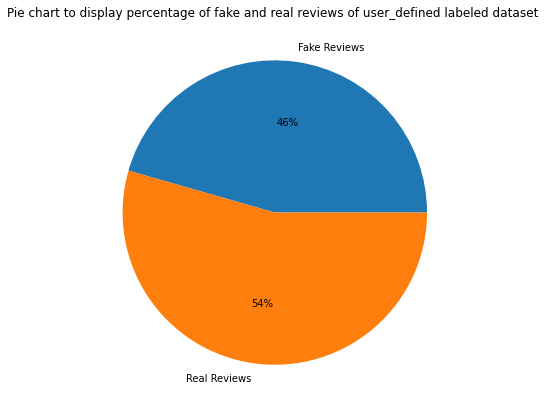

In [ ]:
#visualise the fake or real
fake = 0
real = 0
for score in df_final['fake_or_real']:
    if score == 'Not Genuine':
        fake += 1
    elif score == 'Genuine':
        real += 1

#Visualiing the distribution of Sentiment
values = [fake, real]
label = ['Fake Reviews', 'Real Reviews']

fig = plt.figure(figsize =(10, 7)) 
plt.pie(values, labels = label,autopct='%1.0f%%')
plt.title("Pie chart to display percentage of fake and real reviews of user_defined labeled dataset ")
plt.show()

In [ ]:
df_final.dtypes

Unnamed: 0             int64
marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase      int64
review_headline       object
review_body           object
review_date           object
timestamp            float64
IP Address            object
Sentiment            float64
Subjectivity         float64
Neg_Count              int64
Word_Count             int64
Unique_words           int64
Noun_Count           float64
Adj_Count            float64
Verb_Count           float64
Adv_Count            float64
Pro_Count            float64
Pre_Count            float64
Con_Count            float64
Art_Count            float64
Nega_Count           float64
Aux_Count            float64
Authenticity         float64
AT            

In [ ]:
df_final=df_final.drop(columns=['label'])
df_final.rename(columns = {'fake_or_real':'label'}, inplace = True)


In [ ]:
df_final=df_final.drop(columns=['Unnamed: 0'])
df_final

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Not Genuine
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Not Genuine
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Not Genuine
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Not Genuine
4,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,1.0,...,2.0,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59795,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Genuine
59796,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Not Genuine
59797,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Genuine
59798,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Not Genuine


In [ ]:
df_fuzzy=pd.read_csv('Genuine_NotGenuine.csv')

list(df_fuzzy.columns)


['marketplace',
 'customer_id',
 'review_id',
 'product_id',
 'product_parent',
 'product_title',
 'product_category',
 'star_rating',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date',
 'timestamp',
 'IP Address',
 'Sentiment',
 'Subjectivity',
 'Neg_Count',
 'Word_Count',
 'Unique_words',
 'Noun_Count',
 'Adj_Count',
 'Verb_Count',
 'Adv_Count',
 'Pro_Count',
 'Pre_Count',
 'Con_Count',
 'Art_Count',
 'Nega_Count',
 'Aux_Count',
 'Authenticity',
 'AT',
 'Genuinity',
 'label']

In [ ]:
df_fuzzy

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,0.0,2.0,2.0,1.0,1.0,4.0,0.920000,25.0,0.788911,Genuine
1,US,21299354,R2AT2426ZHFUHH,B00MJCDPM2,563475445,Sentey LS-4460 B-Trek S8 Bluetooth Portable St...,Mobile_Electronics,3,0.0,1.0,...,0.0,2.0,0.0,1.0,1.0,1.0,0.727273,29.0,0.793541,Genuine
2,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,0.0,2.0,2.0,1.0,1.0,4.0,0.920000,25.0,0.788911,Genuine
3,US,21299354,R2AT2426ZHFUHH,B00MJCDPM2,754171872,Sentey LS-4460 B-Trek S8 Bluetooth Portable St...,Mobile_Electronics,3,0.0,1.0,...,0.0,2.0,0.0,1.0,1.0,1.0,0.727273,29.0,0.793541,Genuine
4,US,18944032,R3TZNSOXS13SIG,B00W6OLUGQ,577462547,DTK® AMI MDI MMI Adapter 8-PIN Lightning Cable...,Mobile_Electronics,2,1.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.166667,30.0,0.794149,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28773,US,38056064,R1CSEQKUEBIIY8,B00026IDG0,70026790,Cowon iAUDIO 6 - Digital player / radio - HDD ...,Mobile_Electronics,5,7.0,7.0,...,3.0,3.0,1.0,2.0,1.0,1.0,0.333704,28.0,0.759495,Genuine
28774,US,26663400,R160TNIIRSNKJ0,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,1,0.0,8.0,...,1.0,1.0,0.0,2.0,0.0,2.0,1.000000,27.0,0.199434,Not Genuine
28775,US,30969863,R2BZOEH3ENFZ1L,B00006J05N,777995919,Crosley Mini Bubbler Jukebox (WR18-CR),Mobile_Electronics,5,4.0,12.0,...,2.0,2.0,1.0,2.0,1.0,2.0,1.285714,22.0,0.753143,Genuine
28776,US,51959593,RCE301XOYH19Z,B00006I580,904373353,DIGISETTE DUO-MP3 E-Cassette Player ( Windows ),Mobile_Electronics,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,30.0,0.789298,Genuine


In [ ]:
df_fuzzy=df_fuzzy.drop(columns=['marketplace',
 'product_parent',
 'product_category',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_date',
 'timestamp',
 'Subjectivity',
 'Neg_Count',
 'Word_Count',
 'Unique_words',
 'Noun_Count',
 'Adj_Count',
 'Verb_Count',
 'Adv_Count',
 'Pro_Count',
 'Pre_Count',
 'Con_Count',
 'Art_Count',
 'Nega_Count',
 'Aux_Count',
 'Authenticity',
 'AT','Genuinity'
])

df_final=df_final.drop(columns=['marketplace',
 'product_parent',
 'product_category',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_date',
 'timestamp',
 'Subjectivity',
 'Neg_Count',
 'Word_Count',
 'Unique_words',
 'Noun_Count',
 'Adj_Count',
 'Verb_Count',
 'Adv_Count',
 'Pro_Count',
 'Pre_Count',
 'Con_Count',
 'Art_Count',
 'Nega_Count',
 'Aux_Count',
 'Authenticity',
 'AT','Genuinity'
])

In [ ]:
df_final.dtypes

customer_id          int64
review_id           object
product_id          object
product_title       object
star_rating         object
review_headline     object
review_body         object
IP Address          object
Sentiment          float64
label               object
dtype: object

In [ ]:
df_fuzzy.dtypes

customer_id          int64
review_id           object
product_id          object
product_title       object
star_rating          int64
review_headline     object
review_body         object
IP Address          object
Sentiment          float64
label               object
dtype: object

In [ ]:
#df_final=pd.read_csv('user_defined_labeled_dataset.csv')

df_hybrid=df_final.append(df_fuzzy).reset_index(drop=True)
df_hybrid

,customer_id,review_id,product_id,product_title,star_rating,review_headline,review_body,IP Address,Sentiment,label
0,20422322,R8MEA6IGAHO0B,B00MC4CED8,BlackVue DR600GW-PMP,5,very happy,as advertised everything works perfectly i a...,193.93.167.87,1.000000,Not Genuine
1,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,5,five star,it is great,193.93.167.87,0.800000,Not Genuine
2,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,iXCC Multi pack Lightning cable,5,great cables,these work great and fit my life proof case fo...,193.93.167.87,0.600000,Not Genuine
3,4332923,RRB9C05HDOD4O,B00QUFTPV4,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,4,work very well,work very well,193.93.167.87,0.200000,Not Genuine
4,7846966,RY8DDL22YG4R5,B00KA6CCVY,Aweek® Air Acoustic Earpiece Headset for Baofe...,3,it appears to be good but i m still waiting f...,it appears to be good but i am still waiting ...,205.10.168.66,0.287500,Genuine
...,...,...,...,...,...,...,...,...,...,...
88573,38056064,R1CSEQKUEBIIY8,B00026IDG0,Cowon iAUDIO 6 - Digital player / radio - HDD ...,5,definitely one of the best players around,i was deciding between the iriver and this les...,197.146.130.128,0.167247,Genuine
88574,26663400,R160TNIIRSNKJ0,B00005OTZQ,Royal SE 2800 Hand-Held Spot Cleaner,1,i m glad i got it as a present and didn t use ...,horrible it does not work at all how can the...,209.77.21.216,-1.000000,Not Genuine
88575,30969863,R2BZOEH3ENFZ1L,B00006J05N,Crosley Mini Bubbler Jukebox (WR18-CR),5,wurlitzer jukebox mini bubbler radio and cd pl...,fast shipment well packaged highly recommend...,200.96.72.144,0.180000,Genuine
88576,51959593,RCE301XOYH19Z,B00006I580,DIGISETTE DUO-MP3 E-Cassette Player ( Windows ),2,nice except it breaks,this item worked well for a couple of weeks bu...,223.138.215.33,-0.076923,Genuine


In [ ]:
#export labeled dataset to csv
df_hybrid.to_csv('labeled_dataset.csv')


In [ ]:
df_hybrid=pd.read_csv('labeled_dataset.csv')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


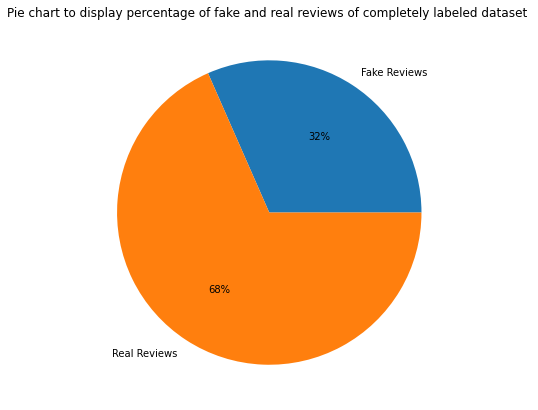

In [ ]:
#visualise the fake or real
fake = 0
real = 0
for score in df_hybrid['label']:
    if score == 'Not Genuine':
        fake += 1
    elif score == 'Genuine':
        real += 1

#Visualiing the distribution of Sentiment
values = [fake, real]
label = ['Fake Reviews', 'Real Reviews']

fig = plt.figure(figsize =(10, 7)) 
plt.pie(values, labels = label,autopct='%1.0f%%')
plt.title("Pie chart to display percentage of fake and real reviews of completely labeled dataset ")

plt.show()

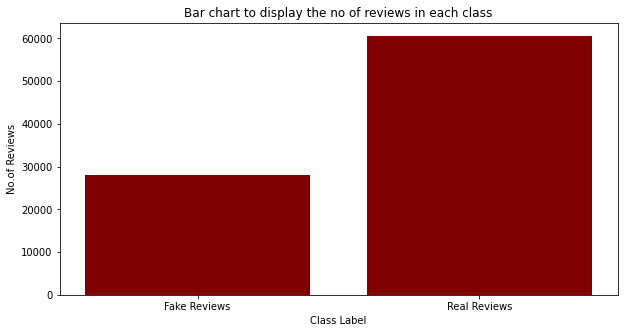

In [ ]:
fig = plt.figure(figsize = (10, 5))
values = [fake, real]
label = ['Fake Reviews', 'Real Reviews']

# creating the bar plot
plt.bar(label, values, color ='maroon')
 
plt.xlabel("Class Label")
plt.ylabel("No.of Reviews")
plt.title("Bar chart to display the no of reviews in each class")
plt.show()

In [ ]:
df_hybrid


,Unnamed: 0,customer_id,review_id,product_id,product_title,star_rating,review_headline,review_body,IP Address,Sentiment,label
0,0,20422322,R8MEA6IGAHO0B,B00MC4CED8,BlackVue DR600GW-PMP,5,very happy,as advertised everything works perfectly i a...,193.93.167.87,1.000000,Not Genuine
1,1,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,5,five star,it is great,193.93.167.87,0.800000,Not Genuine
2,2,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,iXCC Multi pack Lightning cable,5,great cables,these work great and fit my life proof case fo...,193.93.167.87,0.600000,Not Genuine
3,3,4332923,RRB9C05HDOD4O,B00QUFTPV4,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,4,work very well,work very well,193.93.167.87,0.200000,Not Genuine
4,4,7846966,RY8DDL22YG4R5,B00KA6CCVY,Aweek® Air Acoustic Earpiece Headset for Baofe...,3,it appears to be good but i m still waiting f...,it appears to be good but i am still waiting ...,205.10.168.66,0.287500,Genuine
...,...,...,...,...,...,...,...,...,...,...,...
88573,88573,38056064,R1CSEQKUEBIIY8,B00026IDG0,Cowon iAUDIO 6 - Digital player / radio - HDD ...,5,definitely one of the best players around,i was deciding between the iriver and this les...,197.146.130.128,0.167247,Genuine
88574,88574,26663400,R160TNIIRSNKJ0,B00005OTZQ,Royal SE 2800 Hand-Held Spot Cleaner,1,i m glad i got it as a present and didn t use ...,horrible it does not work at all how can the...,209.77.21.216,-1.000000,Not Genuine
88575,88575,30969863,R2BZOEH3ENFZ1L,B00006J05N,Crosley Mini Bubbler Jukebox (WR18-CR),5,wurlitzer jukebox mini bubbler radio and cd pl...,fast shipment well packaged highly recommend...,200.96.72.144,0.180000,Genuine
88576,88576,51959593,RCE301XOYH19Z,B00006I580,DIGISETTE DUO-MP3 E-Cassette Player ( Windows ),2,nice except it breaks,this item worked well for a couple of weeks bu...,223.138.215.33,-0.076923,Genuine


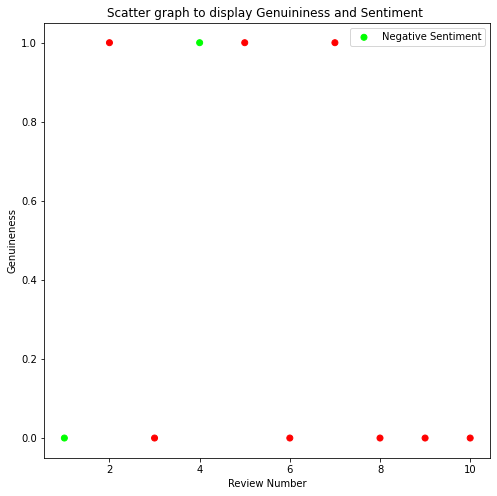

In [ ]:
import matplotlib.pyplot as plt
revno=list(range(1,11))
Genuine_scatter=[]
Sentiment_scatter=[]
low = (0, 1, 0)
medium = ()
high = (1, 0, 0)

for i in range(50,60):
    if df_hybrid['label'][i] == 'Not Genuine':
        Genuine_scatter.append(0)
    elif df_hybrid['label'][i] == 'Genuine':
        Genuine_scatter.append(1)
    if df_hybrid['Sentiment'][i]<0:
        Sentiment_scatter.append(low)
    elif df_hybrid['Sentiment'][i] >0:
        Sentiment_scatter.append(high)
plt.scatter(
    x=revno,
    y=Genuine_scatter,
    c=Sentiment_scatter
)
 
plt.xlabel("Review Number")
plt.ylabel("Genuineness") 
plt.legend(["Negative Sentiment","Positive Sentiment"])
plt.title("Scatter graph to display Genuininess and Sentiment ")

plt.rcParams['figure.figsize'] = [5, 10]
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d611ce83-46e4-4a42-b601-819324222ef9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>